# Miller et al. (2013): Nearside Lateral Impact


- Performed by: Yash Niranjan Poojary
- Reviewed by: Johan Iraeus and Bengt Pipkorn
- Last modified : 17th January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Miller et al. (2013)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Miller et al.  <sup>[1]</sup>
1. Miller CS, Madura NH, Schneider LW, Klinich KD, Reed MP, Rupp JD. PMHS impact response in 3 m/s and 8 m/s nearside impacts with abdomen offset. SAE Technical Paper; 2013 Nov 11.

<!-- ![](../_env/setup_miller_S11.PNG)  -->
```{figure} ../_env/setup_miller_S11.png
---
align: center
---
Nearside sled setup
```

### Information on the subjects/specimens
- `Coordinate system `    : aligned with Global in simulations
- `Load case`    : Nearside-lateral impact with padded wall
- series of lateral impacts was performed using seven male PMHS to quantify the impact responses of the abdomen, thorax, iliac wing, greater trochanter, and mid-thigh.

| **Test Series ID** | **Age [year]** | **Sex** | **Stature [cm]** | **Mass [kg]** | **3m/s tests** | **8m/s tests** | **10 m/s tests** |
| :----------------: | :------------: | :-----: | :--------------: | :-----------: | :------------: | :------------: | :--------------: |
|      NBA0901       |       86       |    M    |       170        |      77       |       X        |                |        X         |
|      NBA1003       |       50       |    M    |       173        |      64       |       X        |                |        X         |
|      NBA1004       |       66       |    M    |       173        |      79       |       X        |       X        |                  |
|      NBA1005       |       51       |    M    |       183        |      98       |       X        |       X        |                  |
|      NBA1006       |       34       |    M    |       188        |      102      |       X        |       X        |                  |
|      NBA1007       |       87       |    M    |       175        |      72       |       X        |                |                  |
|      NBA1108       |       85       |    M    |       178        |      56       |       X        |                |        X         |

### Loading and Boundary Conditions
- Each PMHS was subjected with low seviarity ($3m/s$) impact, tests with high seviarity ($8m/s,10m/s$). Repeated tests was done on the opposite ends of the PMHS.
- The consists of 2 parts, the "impact" and "occupant" sled
- The Impact sled weighed 725 kg and occupant sled weighed 360 kg.
- The impact sled was pneumatically accelerated to an initial velocity. 
- Segmented impactors in the impact sled were aligned to the desired body parts.

#### Impact wall-Foam segment positions
- Segments of the impact wall were adjustable, so the segments were matched anotomically as described in the litrature to the HBM. The positions for each segment are reported below,
    - The position of the thorax plate was set so the top of the plate was immediately below the axilla of a raised arm (about the 4th rib laterally) 
    - bottom of the thorax plate was approximately at the top of the 9th rib laterally. 
    - The plate that loaded the abdomen was adjusted so the top was at the approximate level of the 10th rib and the bottom was just above the superior margin of the iliac wing. 
    - Positions of the plates that loaded the greater trochanter and iliac wing were not varied between tests, as the baseline locations for these plates were such that they loaded the target body regions for all subjects. 
    - In all tests, the abdomen pad was offset 51 mm toward the subject relative to the other loading plates.

<!-- ![](../_env/position.PNG)  -->

#### Pre-Simulation for Initial position:
- The PMHS was in a seated position in the occupant sled with a raised arm.
- The HBM is brought into this position using cables and gravity setteling for $350 ms$.
- `GLOBAL_DAMPING` of magnitude $0.04$ is defined during this phase to avoid any kinetic energy.
- 7 cables (head COG and Upper extremity ) attached to the bones are used to position the body parts.
- The arms are raised above the the head additionally using a seatbelt retractor setup.

<!-- ##### Calculation of half deflection
- Deformation of the subject’s thorax and abdomen the test was calculated from chestband contours.
- The reference lines between the spine anchor point and the most anterior point on the subject’s thorax or abdomen were defined from undeformed (pre-impact) abdomen and thorax chestband contours. 
- Changes in the perpendicular distances between these lines and a location on the chestband corresponding to the most lateral point on the impacted side of the contour in the undeformed condition were used to calculate half-chest and halfabdomen width and deflection. -->

#### Uncertainities and Assumptions:
- The litrature says a cloth tape is used to hold the arm up, when the test starts the cloth tape tearsa off and allows the subject move without constrains. But, the videos from these tests showed in some cases the cloth tape tore late and in some cases it did not break at all . So, in the validations it is decided to keep the cloth tape throughout the simulation.
- Simulations for 3 m/s and 8 m/s were done because these tests reported significant fractures.
- The position of the thorax plate was set so the top of the plate was immediately below the axilla of a raised arm (about the 4th rib laterally) and bottom of the plate was approximately at the top of the 9th rib laterally. This could not be matched with the tests  because of the constraints in SHBM arms. So, position of the impactor is set as high as possible, without interacting with the arm. 

### Responses recorded
- The reported measures were inertially compensated and normalised to a mid sized male.
- Contact forces of each body part and half-deflections of the thorax and abdomen were reported in the litrature.
- The reference values from the paper were digitalised [2]  and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3. Larsson K-J, Blennow A, Iraeus J, Pipkorn B, Lubbe N. [Rib cortical bone fracture risk as a function of age and rib strain: Updated injury prediction using finite element human body models](https://www.frontiersin.org/articles/10.3389/fbioe.2021.677768/full). Frontiers in bioengineering and biotechnology. 2021;9:677768.


In [1]:
import os
import glob
import sys
# for data analysis
import pandas as pd
import numpy as np
from numpy.linalg import norm
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs1 = {"linestyle" :'--', "color" : 'k',"alpha" : 1}
pmhs2 = {"linestyle" :'-', "color" : 'k',"alpha" : 1}
test_corr = {"color": 'silver',"alpha" : 0.7,'linewidth':0.0}
pmhs_average = {"linestyle" :'-.', "color" : 'k',"alpha" : 1,"linewidth":1, 'marker' :"o", 'markevery': 10}

# Notebook specific
sim_start = {"linestyle" :'-', "color" : 'b',"alpha" :0.5,"linewidth":2, 'marker' :"o", 'markevery':5}
sim_max = {"linestyle" :'-', "color" : 'r',"alpha" :0.5,"linewidth":2, 'marker' :"o", 'markevery': 5}
axL = {"linestyle" :'--', "color" : 'grey',"alpha" :0.7,"linewidth":1.5}
ax_lines = {"linestyle" :'--', "alpha" :1,"linewidth":1, 'marker' :"x", 'markevery': 1,'mfc': 'k','mec': 'k','ms': 10}
Lat_pt = {"alpha" :1,"s":80, 'marker' :"X",'ec': 'k','linewidth': 2}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
SubHead = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "110%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [17]:
binout_path_sim={}
result_output_dir={}

Tests=["8ms"]
# Tests=["3ms","8ms"]

figures_dir = "../data/processed/SAFER_11.0/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0"
experiment_dir= "../data/experiment_data/"

if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)
if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [18]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [19]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_ID-V11.def","../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/02_Post.def","../_env/sled_dynamics.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def" ,"../../model/SAFER_11.0/postprocessing/20_rib_strain_calculator.def"]

In [20]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")

    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/02_Post.def
[READ DYNASAUR DEF]	read ../_env/sled_dynamics.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/20_rib_strain_calculator.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID-V11.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[READ BINOUT]	read elout data ...
[READ BINOUT]	elout: initialize stress beam
[READ BINOUT]	assign stresses for beam elements
[READ BINOUT]	nothing to extract
[READ BINOUT]	assign strains for beam elements
[READ BINOUT]	nothing to extract
[READ BINOUT]	elout: initialize stress shell
[READ BINOUT]	assign stresses for shell eleme

In [7]:
# Experiment data
T_3ms=pd.read_csv(os.path.join(experiment_dir,'3ms.csv'), delimiter=';',na_values='-',header=[0,1,2])
T_8ms=pd.read_csv(os.path.join(experiment_dir,'8ms.csv'), delimiter=';',na_values='-',header=[0,1,2])

In [8]:
# Experiment data
T_3ms=pd.read_csv(os.path.join(experiment_dir,'3ms.csv'), delimiter=';',na_values='-',header=[0,1,2])
T_8ms=pd.read_csv(os.path.join(experiment_dir,'8ms.csv'), delimiter=';',na_values='-',header=[0,1,2])

## Resample data
def resam(xdata,ydata,sTime,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(sTime,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newy).flatten()

test_average={}
test_average['Force','3ms','TX']=resam(T_3ms.TX.avg.X.dropna()*1000, T_3ms.TX.avg.Y.dropna(),0,80)
test_average['Force','3ms','AB']=resam(T_3ms.AB.avg.X.dropna()*1000, T_3ms.AB.avg.Y.dropna(),0,80)
test_average['Force','3ms','PL_IW']=resam(T_3ms.PLIW.avg.X.dropna()*1000, T_3ms.PLIW.avg.Y.dropna(),0,80)
test_average['Force','3ms','PL_GT']=resam(T_3ms.PLGT.avg.X.dropna()*1000, T_3ms.PLGT.avg.Y.dropna(),0,80)
test_average['Force','3ms','PL_c']=resam(T_3ms.PLComb.avg.X.dropna()*1000, T_3ms.PLComb.avg.Y.dropna(),0,80)
test_average['Force','3ms','FM']=resam(T_3ms.FM.avg.X.dropna()*1000, T_3ms.FM.avg.Y.dropna(),0,80)
test_average['Deflection','3ms','TX']=resam(T_3ms.TX_def.avg.X.dropna()*1000, T_3ms.TX_def.avg.Y.dropna(),0,80)
test_average['Deflection','3ms','AB']=resam(T_3ms.AB_def.avg.X.dropna()*1000, T_3ms.AB_def.avg.Y.dropna(),0,80)

test_average['Force','8ms','TX']=resam(T_8ms.TX.avg.X.dropna()*1000, T_8ms.TX.avg.Y.dropna(),0,60)
test_average['Force','8ms','AB']=resam(T_8ms.AB.avg.X.dropna()*1000, T_8ms.AB.avg.Y.dropna(),0,60)
test_average['Force','8ms','PL_IW']=resam(T_8ms.PLIW.avg.X.dropna()*1000, T_8ms.PLIW.avg.Y.dropna(),0,60)
test_average['Force','8ms','PL_GT']=resam(T_8ms.PLGT.avg.X.dropna()*1000, T_8ms.PLGT.avg.Y.dropna(),0,60)
test_average['Force','8ms','PL_c']=resam(T_8ms.PLComb.avg.X.dropna()*1000, T_8ms.PLComb.avg.Y.dropna(),0,60)
test_average['Force','8ms','FM']=resam(T_8ms.FM.avg.X.dropna()*1000, T_8ms.FM.avg.Y.dropna(),0,60)
test_average['Deflection','8ms','TX']=resam(T_8ms.TX_def.avg.X.dropna()*1000, T_8ms.TX_def.avg.Y.dropna(),0,60)
test_average['Deflection','8ms','AB']=resam(T_8ms.AB_def.avg.X.dropna()*1000, T_8ms.AB_def.avg.Y.dropna(),0,60)
Sim_ISO={}

## Results
### Low sevearity tests 3m/s
#### Force Response

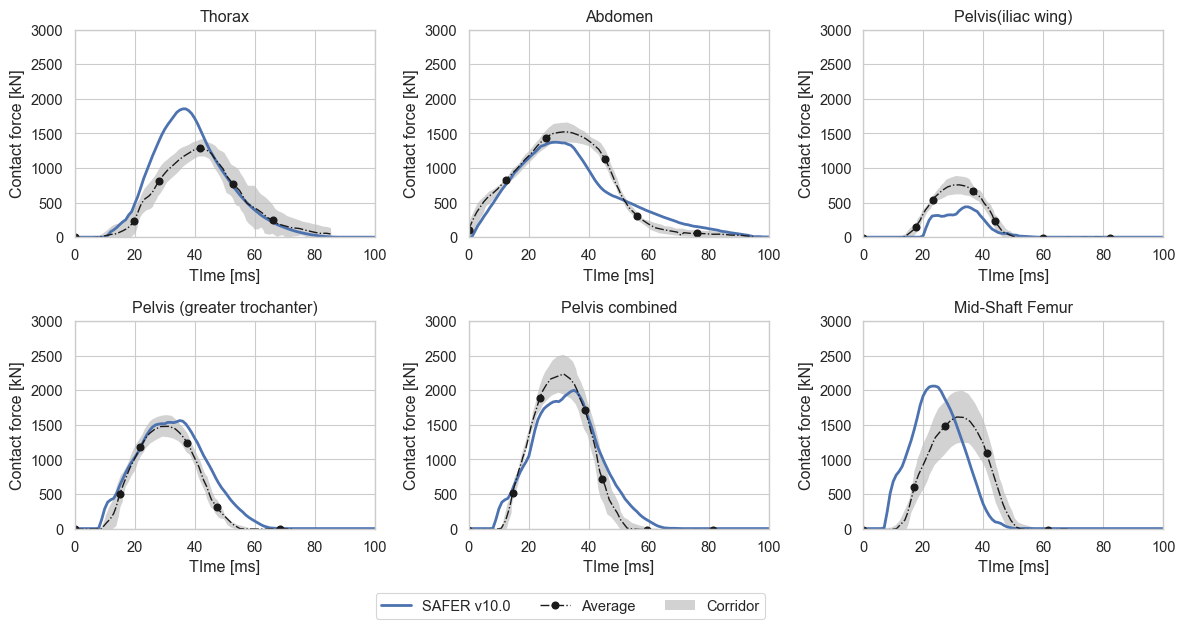

In [21]:
fig_fd, axs = plt.subplots(nrows=2, ncols=3,figsize=(12,6))
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].set_ylabel('Contact force [kN]');
        axs[i,j].set_xlabel('TIme [ms]');
        axs[i,j].set_ylim([0,3000])
        axs[i,j].set_xlim([-0,100])
axs[0,0].set(title='Thorax')
axs[0,0].plot(sim_output["3ms"].MODEL.Thorax_Force.time-370, sim_output["3ms"].MODEL.Thorax_Force.force*1000, label = "SAFER v10.0",**s11)
axs[0,0].plot(T_3ms.TX.avg.X*1000,T_3ms.TX.avg.Y, label = "Average",**pmhs_average)
axs[0,0].fill_between(T_3ms.TX.cor.X,T_3ms.TX.cor.Y, label = "Corridor",**test_corr)
    
axs[0,1].set(title='Abdomen')
axs[0,1].plot( sim_output["3ms"].MODEL.Abdominal_Force.time-370, sim_output["3ms"].MODEL.Abdominal_Force.force*1000,**s11)
axs[0,1].plot(T_3ms.AB.avg.X*1000,T_3ms.AB.avg.Y,**pmhs_average)
axs[0,1].fill_between(T_3ms.AB.cor.X,T_3ms.AB.cor.Y,**test_corr)

axs[0,2].set(title='Pelvis(iliac wing)')
axs[0,2].plot( sim_output["3ms"].MODEL.Pelvic_IW_Force.time-370, sim_output["3ms"].MODEL.Pelvic_IW_Force.force*1000,**s11)
axs[0,2].plot(T_3ms.PLIW.avg.X*1000,T_3ms.PLIW.avg.Y,**pmhs_average)
axs[0,2].fill_between(T_3ms.PLIW.cor.X,T_3ms.PLIW.cor.Y,**test_corr)

axs[1,0].set(title='Pelvis (greater trochanter)')
axs[1,0].plot( sim_output["3ms"].MODEL.Pelvic_GT_Force.time-370, sim_output["3ms"].MODEL.Pelvic_GT_Force.force*1000,**s11)
axs[1,0].plot(T_3ms.PLGT.avg.X*1000,T_3ms.PLGT.avg.Y,**pmhs_average)
axs[1,0].fill_between(T_3ms.PLGT.cor.X,T_3ms.PLGT.cor.Y,**test_corr)
    
axs[1,1].set(title='Pelvis combined')
axs[1,1].plot( sim_output["3ms"].MODEL.Pelvic_IW_Force.time-370, (sim_output["3ms"].MODEL.Pelvic_IW_Force.force 
                                                                    + sim_output["3ms"].MODEL.Pelvic_GT_Force.force)*1000,**s11)
axs[1,1].plot(T_3ms.PLComb.avg.X*1000,T_3ms.PLComb.avg.Y,**pmhs_average)
axs[1,1].fill_between(T_3ms.PLComb.cor.X,T_3ms.PLComb.cor.Y,**test_corr)

axs[1,2].set(title='Mid-Shaft Femur')
axs[1,2].plot( sim_output["3ms"].MODEL.Femur_Mid_Shaft_Force.time-370, sim_output["3ms"].MODEL.Femur_Mid_Shaft_Force.force*1000,**s11)
axs[1,2].plot(T_3ms.FM.avg.X*1000,T_3ms.FM.avg.Y,**pmhs_average)
axs[1,2].fill_between(T_3ms.FM.cor.X,T_3ms.FM.cor.Y,**test_corr)

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=3)
fig_fd.tight_layout()
Sim_ISO['Time']=sim_output["3ms"].MODEL.Thorax_Force.time-370
Sim_ISO['Force','3ms','TX']=sim_output["3ms"].MODEL.Thorax_Force.force*1000
Sim_ISO['Force','3ms','AB']=sim_output["3ms"].MODEL.Abdominal_Force.force*1000
Sim_ISO['Force','3ms','PL_IW']=sim_output["3ms"].MODEL.Pelvic_IW_Force.force*1000
Sim_ISO['Force','3ms','PL_GT']=sim_output["3ms"].MODEL.Pelvic_GT_Force.force*1000
Sim_ISO['Force','3ms','PL_c']=(sim_output["3ms"].MODEL.Pelvic_IW_Force.force+ sim_output["3ms"].MODEL.Pelvic_GT_Force.force)*1000
Sim_ISO['Force','3ms','FM']=sim_output["3ms"].MODEL.Femur_Mid_Shaft_Force.force*1000

#### Contact time check
- In the 3 m/s tests, the impactor contacted the subject before the impact sled contacted the occupant sled so that loading of the occupant was complete before sled-to-sled contact.

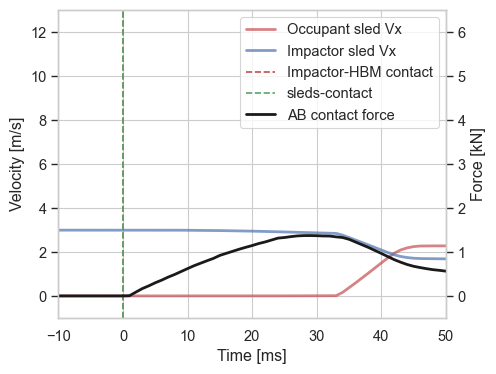

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

ax2 = ax.twinx()
ax2.plot(sim_output["3ms"].MODEL.Abdominal_Force.time-370, sim_output["3ms"].MODEL.Abdominal_Force.force,label='AB contact force',color='k',linewidth=2,alpha=1)
ax.plot(sim_output["3ms"].Sled.Occupant.time-370,sim_output["3ms"].Sled.Occupant.velocity,label='Occupant sled Vx',color='r',linewidth=2,alpha=0.7)
ax.plot(sim_output["3ms"].Sled.Impact.time-370,sim_output["3ms"].Sled.Impact.velocity,label='Impactor sled Vx',color='b',linewidth=2,alpha=0.7)
ax.axvline(0,color='r',linestyle='--',label='Impactor-HBM contact')
ax.axvline(0,color='g',linestyle='--',label='sleds-contact')
ax.set(xlim=[-10,50],ylim=[-1,13],xlabel='Time [ms]',ylabel='Velocity [m/s]')
ax2.set(xlim=[-10,50],ylim=[-0.5,6.5],xlabel='Time [ms]',ylabel='Force [kN]')
ax2.grid(None)
fig.legend( bbox_to_anchor=(0.9,0.88));

#### Energy plots

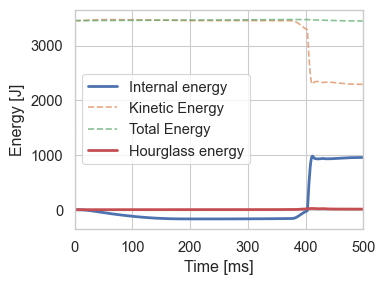

In [23]:
fig_fd, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,3))
ax.plot(sim_output['3ms'].MODEL.Internal_Energy.time,sim_output['3ms'].MODEL.Internal_Energy.energy,linewidth=2)
ax.plot(sim_output['3ms'].MODEL.Kinetic_Energy.time,sim_output['3ms'].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['3ms'].MODEL.Total_Energy.time,sim_output['3ms'].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['3ms'].MODEL.Hourglass_Energy.time,sim_output['3ms'].MODEL.Hourglass_Energy.energy,linewidth=2)
ax.set(xlabel='Time [ms]',ylabel='Energy [J]',xlim=[0,500])

ax.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"]);
fig_fd.tight_layout()

#### ISO18571 objective rating for force-time histories

In [24]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [25]:
## Resample data
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(0,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newy).flatten()
measures=pd.DataFrame(Sim_ISO.keys())[pd.DataFrame(Sim_ISO.keys())!='Time'].dropna()
df_res = pd.DataFrame(columns=['Measure','Speed','Part','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
for measure in measures[0]:
    endT=80
    T_samp=np.arange(0,endT,0.1)
    sim_t=np.array(Sim_ISO['Time']).flatten()
    sim_v=np.array(Sim_ISO[measure]).flatten()
    ref = np.vstack((T_samp, test_average[measure])).T
    s_v=resam(sim_t,sim_v,endT)
    sim = np.vstack((T_samp, s_v)).T
    iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
    df_rate = pd.DataFrame(columns=['Measure','Speed','Part','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    df_rate['Measure']=[measure[0]]
    df_rate['Speed']=measure[1]
    df_rate['Part']=measure[2]
    df_rate['Corridor Score']=[iso_rating.corridor_rating()]
    df_rate['Phase Score']=[iso_rating.phase_rating()]
    df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
    df_rate['Slope Score']=[iso_rating.slope_rating()]
    df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)


Average: 0.77 
Range: 0.67-0.86


,Measure,Speed,Part,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,Force,3ms,TX,0.73,0.78,0.78,0.66,0.74
1,Force,3ms,AB,0.76,0.94,0.89,0.72,0.81
2,Force,3ms,PL_IW,0.69,0.94,0.50,0.65,0.69
3,Force,3ms,PL_GT,0.79,0.91,0.97,0.78,0.85
4,Force,3ms,PL_c,0.84,0.91,0.93,0.75,0.86
5,Force,3ms,FM,0.58,0.56,0.86,0.77,0.67


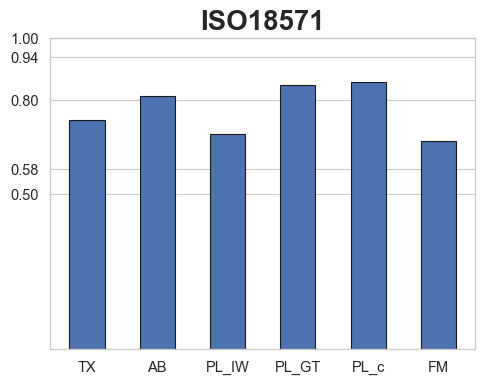

In [26]:
B1={'width' : 0.5 , 'color':'b','alpha':1, 'edgecolor':'k'}

df_BC=df_res.iloc[0:6]

fig, ax = plt.subplots(figsize=(5, 4))
br1 = np.arange(len(df_BC))
ax.bar(br1,df_BC['Overall Score'].values,**B1)

plt.xticks(range(len(df_BC)), df_BC['Part'], rotation=0)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
fig.tight_layout()

df_ISO_summary = pd.DataFrame(columns=['Average','Range'])
df_ISO_summary['Average']=[df_BC['Overall Score'].mean().round(2)]
print('Average: {} \nRange: {}-{}'.format(df_BC['Overall Score'].mean().round(2),
                                           min(df_BC['Overall Score'].round(2)),
                                           max(df_BC['Overall Score'].round(2))))

display(df_BC.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content))

#### Rib injury evaluation
- Three of the seven 3 m/s tests produced rib fractures. 
- The fractures in tests NBA0901A and NBA1007A were lateral and anterior-lateral and involved ribs 2 through 9 on the struck side of the subject. 
- Nondisplaced rib fractures were also observed on the side of the body that was impacted in the 3 m/s test of one other subject (NBA0903A) in the autopsy that occurred following the subsequent high-speed impact. 
- Although these fractures were not visible in the CT scan taken following the 3 m/s test, strain gage data from subsequent tests demonstrates that rib fractures that are not visible on CT can occur in lowspeed tests.
- Some injuries reported during the test are tabulated below.
- `*` indicates the timing of fracture is inconclusive. Fractures may have occurred during initial low speed impact or during subsequent high-speed impact

| **Test ID** | **Side of impact** | **Fractured Ribs** | **Number of fractured ribs** | **Confirmed NFR** |
| :---------: | :----------------: | :----------------: | :--------------------------: | :---------------: |
|   NBA0901   |       Right        |  R2*,R6,R7,R9*,R8  |              5               |         3         |
|   NBA1003   |       Right        |      R5*,R6*       |              2               |         0         |
|   NBA1004   |       Right        |                    |              0               |         0         |
|   NBA1005   |       Right        |                    |              0               |         0         |
|   NBA1006   |       Right        |                    |              0               |         0         |
|   NBA1007   |        Left        |       L7,L8        |              2               |         2         |
|   NBA1108   |       Right        |      R6,R7,R8      |              3               |         3         |

##### Rib Strains

In [27]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

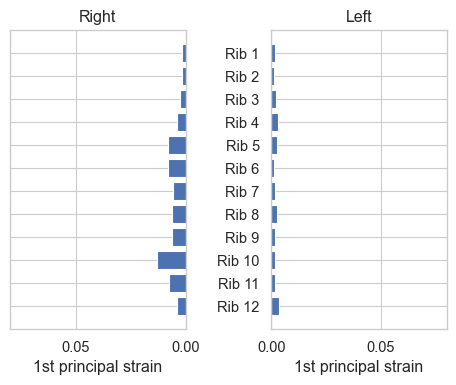

In [28]:
miller_3ms=HBM_rib_risk(sim_output)
miller_3ms.plot_rib_strains("3ms")

##### Fracture Risk

Test: NFR1+ [%],42.9
SHBM NFR1+ [%],12.0
Test: NFR2+ [%],42.9
SHBM NFR2+ [%],0.4
Test: NFR3+ [%],28.6
SHBM NFR3+ [%],0.0


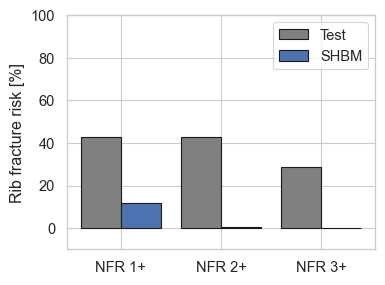

In [29]:
age=[86,50,66,51,34,87,85]
risks={}
for a in age:
    N1p,N2p,N3p=miller_3ms.fx_matrix("3ms",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])

df_fractures['Test: NFR1+ [%]']=[42.9]
df_fractures['Test: NFR2+ [%]']=42.9
df_fractures['Test: NFR3+ [%]']=28.6
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
miller_3ms.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)

### High sevearity tests 8m/s
#### Force response

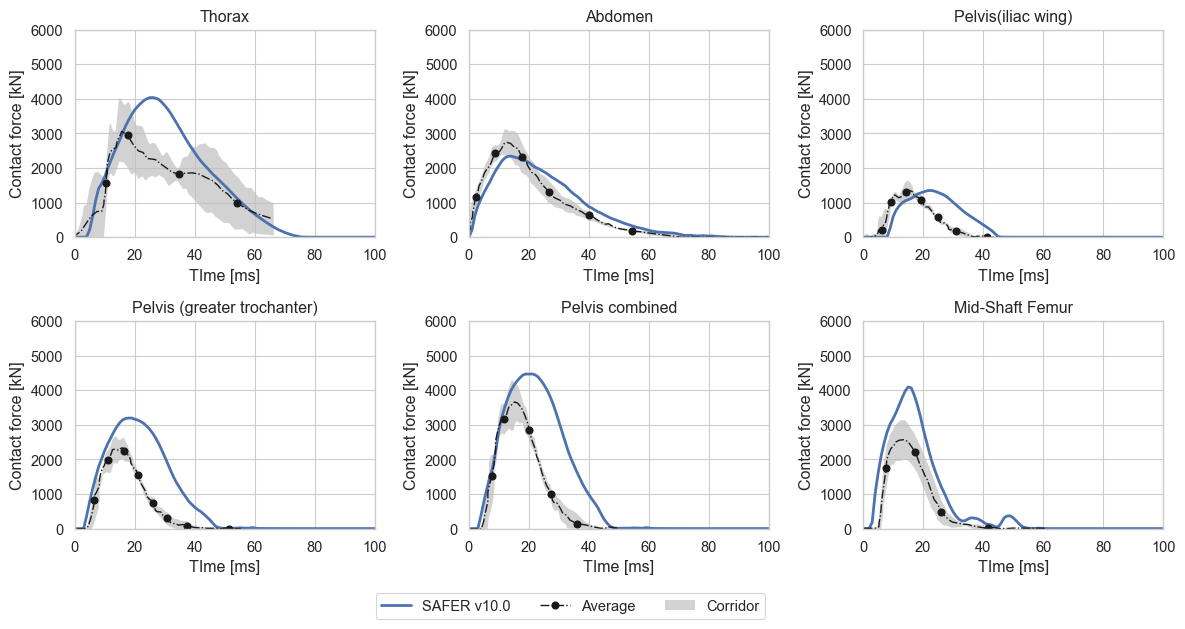

In [21]:

fig_fd, axs = plt.subplots(nrows=2, ncols=3,figsize=(12,6))

for i in range(0,2):
    for j in range(0,3):
        axs[i,j].set_ylabel('Contact force [kN]');
        axs[i,j].set_xlabel('TIme [ms]');
        axs[i,j].set_ylim([0,6000])
        axs[i,j].set_xlim([0,100])

axs[0,0].set(title='Thorax')
axs[0,0].plot(sim_output["8ms"].MODEL.Thorax_Force.time-370, sim_output["8ms"].MODEL.Thorax_Force.force*1000, label = "SAFER v10.0",**s11)
axs[0,0].plot(T_8ms.TX.avg.X*1000,T_8ms.TX.avg.Y, label = "Average",**pmhs_average)
axs[0,0].fill_between(T_8ms.TX.cor.X*1000,T_8ms.TX.cor.Y, label = "Corridor",**test_corr)
    
axs[0,1].set(title='Abdomen')
axs[0,1].plot( sim_output["8ms"].MODEL.Abdominal_Force.time-370, sim_output["8ms"].MODEL.Abdominal_Force.force*1000,**s11)
axs[0,1].plot(T_8ms.AB.avg.X*1000,T_8ms.AB.avg.Y,**pmhs_average)
axs[0,1].fill_between(T_8ms.AB.cor.X*1000,T_8ms.AB.cor.Y,**test_corr)

axs[0,2].set(title='Pelvis(iliac wing)')
axs[0,2].plot( sim_output["8ms"].MODEL.Pelvic_IW_Force.time-370, sim_output["8ms"].MODEL.Pelvic_IW_Force.force*1000,**s11)
axs[0,2].plot(T_8ms.PLIW.avg.X*1000,T_8ms.PLIW.avg.Y,**pmhs_average)
axs[0,2].fill_between(T_8ms.PLIW.cor.X*1000,T_8ms.PLIW.cor.Y,**test_corr)

axs[1,0].set(title='Pelvis (greater trochanter)')
axs[1,0].plot( sim_output["8ms"].MODEL.Pelvic_GT_Force.time-370, sim_output["8ms"].MODEL.Pelvic_GT_Force.force*1000,**s11)
axs[1,0].plot(T_8ms.PLGT.avg.X*1000,T_8ms.PLGT.avg.Y,**pmhs_average)
axs[1,0].fill_between(T_8ms.PLGT.cor.X*1000,T_8ms.PLGT.cor.Y,**test_corr)
    
axs[1,1].set(title='Pelvis combined')
axs[1,1].plot( sim_output["8ms"].MODEL.Pelvic_IW_Force.time-370, (sim_output["8ms"].MODEL.Pelvic_IW_Force.force 
                                                                    + sim_output["8ms"].MODEL.Pelvic_GT_Force.force)*1000,**s11)
axs[1,1].plot(T_8ms.PLComb.avg.X*1000,T_8ms.PLComb.avg.Y,**pmhs_average)
axs[1,1].fill_between(T_8ms.PLComb.cor.X*1000,T_8ms.PLComb.cor.Y,**test_corr)

axs[1,2].set(title='Mid-Shaft Femur')
axs[1,2].plot( sim_output["8ms"].MODEL.Femur_Mid_Shaft_Force.time-370, sim_output["8ms"].MODEL.Femur_Mid_Shaft_Force.force*1000,**s11)
axs[1,2].plot(T_8ms.FM.avg.X*1000,T_8ms.FM.avg.Y,**pmhs_average)
axs[1,2].fill_between(T_8ms.FM.cor.X*1000,T_8ms.FM.cor.Y,**test_corr)

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=3)
fig_fd.tight_layout()

Sim_ISO['Time']=sim_output["8ms"].MODEL.Thorax_Force.time-370
Sim_ISO['Force','8ms','TX']=sim_output["8ms"].MODEL.Thorax_Force.force*1000
Sim_ISO['Force','8ms','AB']=sim_output["8ms"].MODEL.Abdominal_Force.force*1000
Sim_ISO['Force','8ms','PL_IW']=sim_output["8ms"].MODEL.Pelvic_IW_Force.force*1000
Sim_ISO['Force','8ms','PL_GT']=sim_output["8ms"].MODEL.Pelvic_GT_Force.force*1000
Sim_ISO['Force','8ms','PL_c']=(sim_output["8ms"].MODEL.Pelvic_IW_Force.force+ sim_output["8ms"].MODEL.Pelvic_GT_Force.force)*1000
Sim_ISO['Force','8ms','FM']=sim_output["8ms"].MODEL.Femur_Mid_Shaft_Force.force*1000

#### Contact time check
- For 8 m/s tests, the impactor wall contacted the subject at the same time that the impactor sled contacted the occupant sled. 

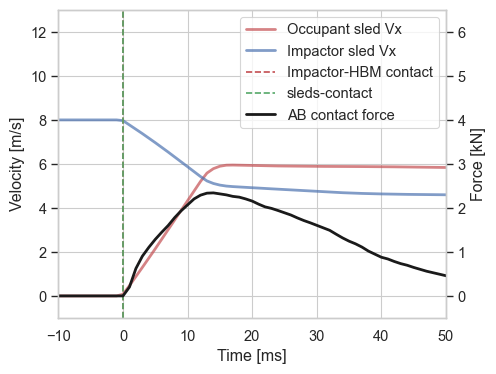

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

ax2 = ax.twinx()
ax2.plot(sim_output["8ms"].MODEL.Abdominal_Force.time-370, sim_output["8ms"].MODEL.Abdominal_Force.force,label='AB contact force',color='k',linewidth=2,alpha=1)
ax.plot(sim_output["8ms"].Sled.Occupant.time-370,sim_output["8ms"].Sled.Occupant.velocity,label='Occupant sled Vx',color='r',linewidth=2,alpha=0.7)
ax.plot(sim_output["8ms"].Sled.Impact.time-370,sim_output["8ms"].Sled.Impact.velocity,label='Impactor sled Vx',color='b',linewidth=2,alpha=0.7)
ax.axvline(0,color='r',linestyle='--',label='Impactor-HBM contact')
ax.axvline(0,color='g',linestyle='--',label='sleds-contact')
ax.set(xlim=[-10,50],ylim=[-1,13],xlabel='Time [ms]',ylabel='Velocity [m/s]')
ax2.set(xlim=[-10,50],ylim=[-0.5,6.5],xlabel='Time [ms]',ylabel='Force [kN]')
ax2.grid(None)
fig.legend( bbox_to_anchor=(0.9,0.88));

#### Energy plots

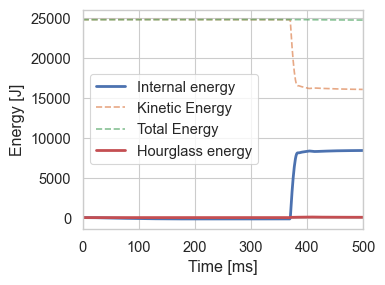

In [23]:
fig_fd, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,3))
ax.plot(sim_output['8ms'].MODEL.Internal_Energy.time,sim_output['8ms'].MODEL.Internal_Energy.energy,linewidth=2)
ax.plot(sim_output['8ms'].MODEL.Kinetic_Energy.time,sim_output['8ms'].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['8ms'].MODEL.Total_Energy.time,sim_output['8ms'].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['8ms'].MODEL.Hourglass_Energy.time,sim_output['8ms'].MODEL.Hourglass_Energy.energy,linewidth=2)
ax.set(xlabel='Time [ms]',ylabel='Energy [J]',xlim=[0,500])

ax.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"]);
fig_fd.tight_layout()

#### ISO18571 objective rating for force-time histories

In [24]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [25]:
## Resample data
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(0,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newy).flatten()
measures=pd.DataFrame(Sim_ISO.keys())[pd.DataFrame(Sim_ISO.keys())!='Time'].dropna()
df_res = pd.DataFrame(columns=['Measure','Speed','Part','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
for measure in measures[0]:
    endT=60
    T_samp=np.arange(0,endT,0.1)
    sim_t=np.array(Sim_ISO['Time']).flatten()
    sim_v=np.array(Sim_ISO[measure]).flatten()
    ref = np.vstack((T_samp, test_average[measure])).T
    s_v=resam(sim_t,sim_v,endT)
    sim = np.vstack((T_samp, s_v)).T
    iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
    df_rate = pd.DataFrame(columns=['Measure','Speed','Part','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    df_rate['Measure']=[measure[0]]
    df_rate['Speed']=measure[1]
    df_rate['Part']=measure[2]
    df_rate['Corridor Score']=[iso_rating.corridor_rating()]
    df_rate['Phase Score']=[iso_rating.phase_rating()]
    df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
    df_rate['Slope Score']=[iso_rating.slope_rating()]
    df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)


Average: 0.62 
Range: 0.49-0.79


,Measure,Speed,Part,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,Force,8ms,TX,0.58,0.87,0.63,0.42,0.61
1,Force,8ms,AB,0.74,0.78,0.94,0.75,0.79
2,Force,8ms,PL_IW,0.52,0.54,0.94,0.51,0.60
3,Force,8ms,PL_GT,0.44,0.73,0.39,0.46,0.49
4,Force,8ms,PL_c,0.56,0.69,0.66,0.57,0.61
5,Force,8ms,FM,0.57,0.98,0.58,0.43,0.63


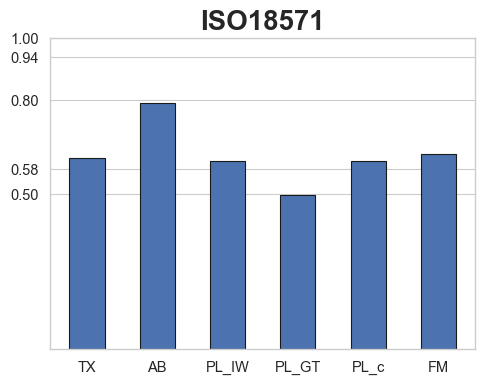

In [26]:
B1={'width' : 0.5 , 'color':'b','alpha':1, 'edgecolor':'k'}

df_BC=df_res.iloc[0:6]

fig, ax = plt.subplots(figsize=(5, 4))
br1 = np.arange(len(df_BC))
ax.bar(br1,df_BC['Overall Score'].values,**B1)

plt.xticks(range(len(df_BC)), df_BC['Part'], rotation=0)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
fig.tight_layout()


print('Average: {} \nRange: {}-{}'.format(df_BC['Overall Score'].mean().round(2),
                                           min(df_BC['Overall Score'].round(2)),
                                           max(df_BC['Overall Score'].round(2))))

display(df_BC.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content))

#### Rib injury evaluation
- One of the three 8 m/s tests did not produce any injuries (NBA1004B), while the remaining 8 m/s tests resulted in three struck-side rib fractures (NBA1005B) and a single rib fracture to the struck side (NBA1006B). 
- None of the subjects sustained pelvic injuries.
- Some injuries reported during the test are tabulated below.

| **Test ID** | **Age [years]** | **Side of impact** | **Fractured Ribs** | **Number of fractured ribs** |
| :---------: | :-------------: | :----------------: | :----------------: | :--------------------------: |
|   NBA1004   |       66        |        Left        |                    |              0               |
|   NBA1005   |       51        |        Left        |      L4,L5,L6      |              3               |
|   NBA1006   |       34        |        Left        |         L5         |              1               |

##### Rib Strains

In [27]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

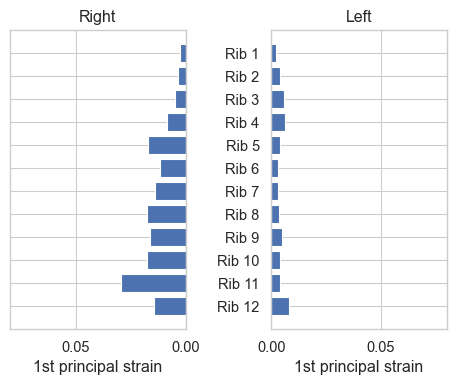

In [28]:
miller_8ms=HBM_rib_risk(sim_output)
miller_8ms.plot_rib_strains("8ms")

##### Fracture Risk

Test: NFR1+ [%],66.7
SHBM NFR1+ [%],72.7
Test: NFR2+ [%],33.3
SHBM NFR2+ [%],32.3
Test: NFR3+ [%],33.3
SHBM NFR3+ [%],11.3


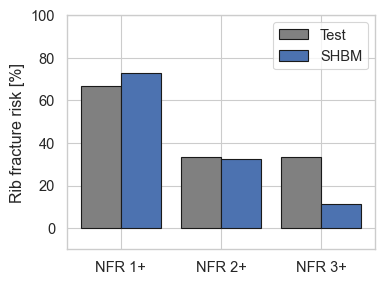

In [29]:
age=[66,51,34]
risks={}
for a in age:
    N1p,N2p,N3p=miller_8ms.fx_matrix("8ms",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
df_fractures['Test: NFR1+ [%]']=[66.7]
df_fractures['Test: NFR2+ [%]']=33.34
df_fractures['Test: NFR3+ [%]']=33.34
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
miller_8ms.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)